In [31]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import aesara_theano_fallback.tensor as tt
import exoplanet as xo

import pymc3 as pm
import pymc3_ext as pmx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
import pickle
import seaborn as sns
from astropy.io import ascii
from datetime import date

sns.set_style('ticks')
sns.set_palette('viridis')

from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
rc('text.latex', preamble=r'\usepackage{cmbright}')

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params)

from MonoTools.MonoTools import tools,lightcurve,fit

alldata=pickle.load(open("all_data_for_combined_model.pkl","rb"))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
s16ix=alldata['tess']['time']<1850
t16lc=lightcurve.lc()
t16lc.load_lc(time=alldata['tess']['time'][s16ix],fluxes={'flux':alldata['tess']['flux'][s16ix]},
              flx_system='ppt',flux_errs={'flux_err':alldata['tess']['flux_err'][s16ix]},jd_base=2457000,
              src='vand',mission='tess',sect=16)
s23ix=alldata['tess']['time']>1850
t23lc=lightcurve.lc()
t23lc.load_lc(time=alldata['tess']['time'][s23ix], fluxes={'flux':alldata['tess']['flux'][s23ix]}, flx_system='ppt',
              flux_errs={'flux_err':alldata['tess']['flux_err'][s23ix]}, jd_base=2457000,
              src='vand',mission='tess',sect=23)

#xlc.load_lc(time=alldata['cheops_3']['time'],fluxes={'flux':alldata['cheops_3']['flux']},
#               flux_errs={'flux_err':alldata['cheops_3']['flux_err']},
#               src='pych',mission='cheops',jd_base=2457000,flx_system='ppt',sect=0)
#xlc.make_mask()

In [3]:
ilc=lightcurve.multilc(27491137, 'tess', do_search=False, load=False)
ilc.stack([t16lc,t23lc])

In [4]:
fit.monoModel?

In [5]:
model1 = fit.monoModel(27491137, 'tess', savefileloc='/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-22_0_model.pickle')

Getting all IDs
Empty TableList


In [9]:
model1.LoadModelFromFile(loadfile='/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-22_0_model.pickle')

True

In [16]:
model1 = fit.monoModel(27491137, 'tess', lc=ilc)
# model1.init_starpars(Rstar=np.array([0.761,0.016,0.016]),
#                      Teff=np.array([5187,54,53]),
#                      logg=np.array([4.605,0.018,0.019]),
#                      FeH=-0.032)
model1.init_starpars(Rstar=np.array([0.8,0.03,0.03]),
                    Teff=np.array([5210,100,100]),
                    logg=np.array([4.68,0.1,0.1]),
                    FeH=-0.15)

In [17]:
model1.add_planet('multi',{'tcen':1743.7199,'period':10.356192390280784,'period_err':0.0025,
                          'tdur':3.3/24,'depth':1.4e-3},'b')
model1.add_planet('duo',{'tcen':1748.675688904365,'tcen_2':1937.821199104365,
                        'tdur':0.2,'depth':2.2e-3},'c')
model1.add_planet('duo',{'tcen':1762.6651396199247,'tcen_2':1938.2899096646295,
                        'tdur':0.15,'depth':2e-3},'d')


In [21]:
model1.init_model(use_GP=True, bin_oot=True)

initialising and training the GP
4.1887902047863905 117.16895677724169 0.6283185307179586 {'alpha': 6.570746817359475, 'beta': 8.763441085702263} 1.157539843441598
0.011175945166807519 0.011175945166807519 0.4723405529185598


optimizing logp for variables: [phot_mean, phot_w0, phot_power, logs2]


message: Optimization terminated successfully.
logp: -10.715902602314518 -> -1.7772680218764196


Multiprocess sampling (2 chains in 4 jobs)
NUTS: [phot_power, phot_w0, logs2, phot_mean]


Sampling 2 chains for 594 tune and 900 draw iterations (1_188 + 1_800 draws total) took 15 seconds.


ts
ts
ts


optimizing logp for variables: [tdur_d, b_d, logror_d, tdur_c, b_c, logror_c, b_b, logror_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -4874.1108397506 -> -4277.73260927641
optimizing logp for variables: [t0_2_d, logror_d, t0_2_c, logror_c, per_b, logror_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -4277.732609276411 -> -4153.451629018688
optimizing logp for variables: [tdur_d, b_d, logror_d, t0_d, tdur_c, b_c, logror_c, t0_c, omega_b, ecc_b, b_b, logror_b, t0_b, logrho_S]


message: Desired error not necessarily achieved due to precision loss.
logp: -4153.4516290186875 -> -4065.1862876982805
optimizing logp for variables: [phot_mean, phot_w0, phot_power, logs2]


message: Desired error not necessarily achieved due to precision loss.
logp: -4065.1862876982786 -> -3704.430350526803
optimizing logp for variables: [tdur_d, b_d, logror_d, tdur_c, b_c, logror_c, per_b, b_b, logror_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -3704.430350526803 -> -3703.6876018801745
optimizing logp for variables: [u_star_tess, logrho_S, Rs, logs2, phot_mean, phot_w0, phot_power, tdur_d, b_d, logror_d, t0_d, tdur_c, b_c, logror_c, t0_c, omega_b, ecc_b, b_b, logror_b, t0_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -3703.6876018801745 -> -3687.1518722566084
optimizing logp for variables: [phot_mean, phot_power, phot_w0, logs2, u_star_tess, tdur_d, b_d, logror_d, t0_2_d, t0_d, tdur_c, b_c, logror_c, t0_2_c, t0_c, b_b, omega_b, ecc_b_frac, ecc_b_sigma_rayleigh, ecc_b_sigma_gauss, ecc_b, logror_b, per_b, t0_b, Rs, logrho_S]


message: Desired error not necessarily achieved due to precision loss.
logp: -3687.1518722566084 -> -3684.465414086718


row 0 col (0, 24)
2 0 [0]
row 1 col (0, 24)
2 1 [1]
1 resids 22 24
1 norm 16 22
1 resids 14 16
1 norm 8 14
1 resids 6 8
1 norm 0 6
initialising transit
Initalising Transit models for plotting with n_samp= 10
3
Initalising GP models for plotting with n_samp= 1
0 b 10.355679565039217 1743.7212968890517
1 b 10.355679565039217 1743.7212968890517
0 c 189.12789017483715 1937.8219517917805
1 c 189.12789017483715 1937.8219517917805
0 d 175.62332259052664 1938.2911789267155
1 d 175.62332259052664 1938.2911789267155


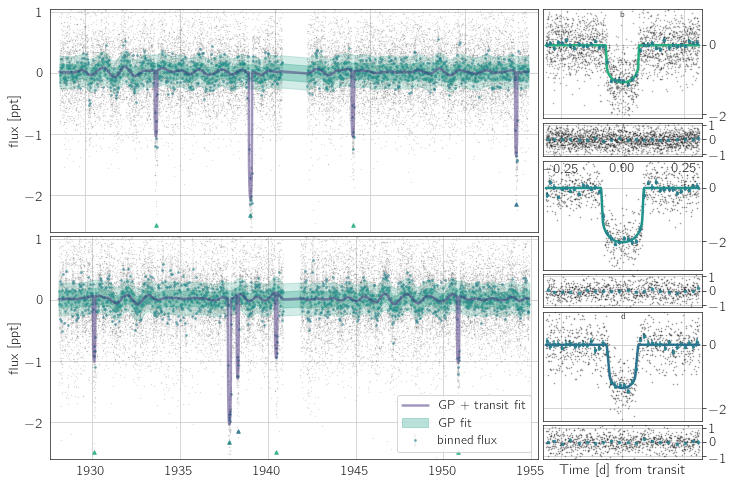

In [28]:
model1.Plot(n_samp=1,overwrite=True)

In [29]:
model1.RunMcmc(n_draws=1000)

['/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-22_0', '/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137'] False


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phot_mean, phot_power, phot_w0, logs2, u_star_tess, tdur_d, b_d, logror_d, t0_2_d, t0_d, tdur_c, b_c, logror_c, t0_2_c, t0_c, b_b, omega_b, ecc_b_frac, ecc_b_sigma_rayleigh, ecc_b_sigma_gauss, ecc_b, logror_b, per_b, t0_b, Rs, logrho_S]


Sampling 4 chains for 660 tune and 1_000 draw iterations (2_640 + 4_000 draws total) took 2760 seconds.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
There were 244 divergences after tuning. Increase `target_accept` or reparameterize.
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.


['gp_', '_gp', 'light_curve', '__', 'model_rv', 'marg_all_lc', 'marg_all_rv', 'rv_model', 'rv_trend', 'nonmarg_rvs', 'mono_uniform_index', 'logliks', '_priors', 'logprob_marg', 'logrho_S', 'mono_pers', 'duo_pers', 'mono_eccs', 'duo_eccs', 'mono_omegas', 'duo_omegas'] ['Rs', 'per_b', 'logs2', 'rho_S', 'Ms', 't0_b', 'logror_b', 'ror_b', 'rpl_b', 'logmassest_b', 'ecc_b', 'ecc_b_sigma_gauss', 'ecc_b_sigma_rayleigh', 'ecc_b_frac', 'omega_b', 'b_b', 'a_Rs_b', 't0_c', 't0_2_c', 'per_c', 'logror_c', 'ror_c', 'rpl_c', 'logmassest_c', 'b_c', 'tdur_c', 'vel_c', 'logvel_c', 'min_ecc_c', 'omega_c', 'a_Rs_c', 't0_d', 't0_2_d', 'per_d', 'logror_d', 'ror_d', 'rpl_d', 'logmassest_d', 'b_d', 'tdur_d', 'vel_d', 'logvel_d', 'min_ecc_d', 'omega_d', 'a_Rs_d', 'u_star_tess', 'phot_w0', 'phot_power', 'phot_mean', 'phot_S0', 'dist_in_transit_b', 'vel_b', 'logvel_b', 'tdur_b', 'per_prior_c', 'max_ecc_c', 'v_prior_c', 'logprior_c', 'per_prior_d', 'max_ecc_d', 'v_prior_d', 'logprior_d', 'logprob_c', 'ecc_c', 'ecc

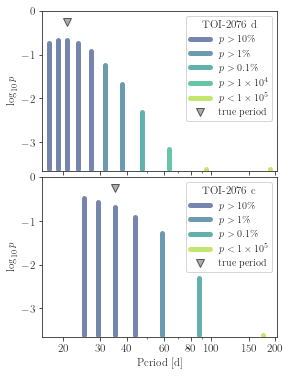

In [32]:
from scipy.special import logsumexp
pal=sns.color_palette('viridis_r',7)
coldic={-6:"$p<1\\times10^{5}$",-5:"$p>1\\times10^{5}$",-4:"$p>1\\times10^{4}$",-3:"$p>0.1\%$",-2:"$p>1\%$",-1:"$p>10\%$",0:"$p>100\%$"}
plt.figure(figsize=(4.2,6))
plot_pers=['c','d']
pmax=185
pmin=16
ymin=-3.66
ymax=0.0
xlog=True
for npl, pl in enumerate(plot_pers):
    plt.subplot(len(plot_pers),1,npl+1)
    #As we're using the nanmedian log10(prob)s for each period, we need to make sure their sums add to 1.0
    probs=logsumexp(model1.trace['logprob_marg_'+pl] - logsumexp(model1.trace['logprob_marg_'+pl]),axis=0)/np.log(10)
    pers = np.nanmedian(model1.trace['per_'+pl],axis=0)
    pmax = np.nanmax(pers)*1.03 if pmax is None else pmax
    pmin = np.nanmin(pers)*0.9 if pmin is None else pmin
    ymin = np.min(probs[pers<pmax])-0.5 if ymin is None else ymin
    ymax = np.max(probs[pers<pmax])+0.5 if ymax is None else ymax
    #psum=logsumexp(np.nanmedian(self.trace['logprob_marg_'+pl],axis=0))/np.log(10)
    #Plotting lines
    cols=[]
    #plt.plot(pers,prob_prcnts[0,:],":",color='C0',alpha=0.65)
    #plt.plot(pers,prob_prcnts[2,:],":",color='C0',alpha=0.65)
    ordered_prob_index=np.arange(len(probs))[np.argsort(probs)][::-1]
    for n in ordered_prob_index:
        # Density Plot and Histogram of all arrival delays
        #nprob=probs[n]
        ncol=int(np.floor(np.clip(probs[n],-6,0)))
        if ncol not in cols:
            cols+=[ncol]
            plt.plot(np.tile(pers[n],2),
                         [ymin+0.05,probs[n]],
                         linewidth=5.0,color=pal[6+ncol],alpha=0.7,label=coldic[ncol])
        else:
            plt.plot(np.tile(pers[n],2),
                         [ymin+0.05,probs[n]],
                         linewidth=5.0,color=pal[6+ncol],alpha=0.7)

    #plt.title("Duo - "+str(pl))
    plt.ylim(ymin,ymax)
    
    if xlog:
        plt.xscale('log')
        plt.xticks([20,30,40,60,80,100,150,200,250,300,350,400,450,500,600,700],
                   np.array([20,30,40,60,80,100,150,200,250,300,350,400,450,500,600,700]).astype(str))
        #plt.xticklabels([20,40,60,80,100,150,200,250])
    if npl==0:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel("Period [d]")

    plt.ylabel("$\log_{10}{p}$")
    plt.xlim(pmin,pmax*1.1)

plt.subplot(211)
plt.plot(21.01,-0.25,'v',markersize=8,color='#777',markeredgecolor='k',label='true period',alpha=0.6)
plt.legend(loc=1,fontsize=10,title="TOI-2076 d")
plt.subplot(212)
plt.plot(35.1,-0.25,'v',markersize=8,color='#777',markeredgecolor='k',label='true period',alpha=0.6)
plt.legend(loc=1,fontsize=10,title="TOI-2076 c")

plt.subplots_adjust(hspace=0.04)
plt.savefig("TOI-2076CheopsPaper/Pre-Cheops_modelling_bc_postref.pdf")

In [47]:
for npl, pl in enumerate(['c','d']):
    probs=logsumexp(model1.trace['logprob_marg_'+pl] - logsumexp(model1.trace['logprob_marg_'+pl]),axis=0)/np.log(10)
    pers = np.nanmedian(model1.trace['per_'+pl],axis=0)
    print({pers[p]:np.power(10,probs[p]) for p in range(len(probs))})

{189.12795290161102: 8.657643846874049e-18, 94.56397645080551: 1.0908729008871636e-06, 63.04265096720367: 0.0006783176445033975, 47.281988225402756: 0.00497177953527879, 37.825590580322206: 0.020994613174720043, 31.521325483601835: 0.05825150299407229, 27.01827898594443: 0.11825998672605927, 23.640994112701378: 0.1863836656593845, 21.01421698906789: 0.21205476616595398, 18.912795290161103: 0.21588118553460314, 17.19345026378282: 0.18252309169252412}
{175.62346514797957: 1.7669205134879091e-09, 87.81173257398979: 0.005016514104159064, 58.54115504932652: 0.05176872423148549, 43.90586628699489: 0.12329502693797012, 35.12469302959592: 0.20247400370235363, 29.27057752466326: 0.27513807944157254, 25.089066449711368: 0.34230764981553874}


In [ ]:
c:0.0049->0.021
d:0.05->0.12

In [34]:
model1.planets['c']

{'tcen': 1937.821199104365,
 'tcen_2': 1748.675688904365,
 'tdur': 0.2,
 'depth': 0.0022,
 'ror': 0.0469041575982343,
 'log_ror': -3.0596489593089333,
 'r_pl': 4.097547207781749,
 'period_err': 999,
 'period': 189.1455102,
 'period_int_aliases': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 'period_aliases': array([189.1455102 ,  94.5727551 ,  63.0485034 ,  47.28637755,
         37.82910204,  31.5242517 ,  27.02078717,  23.64318877,
         21.0161678 ,  18.91455102,  17.19504638]),
 'P_min': 17.19504638181818,
 'npers': 11,
 'b': 0.1}

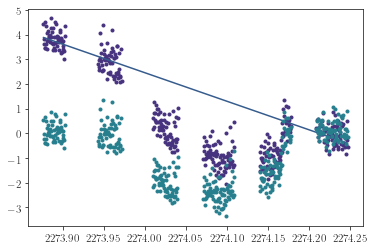

In [33]:
#alldata=pickle.load(open("all_data_for_combined_model.pkl","rb"))
plt.plot(alldata['cheops_3']['time'],alldata['cheops_3']['flux'],'.')
x=(alldata['cheops_3']['time']-2274.1)
c=1.3
m=-(3.7-1.38)/0.2
y=alldata['cheops_3']['flux']-(m*x+c)
plt.plot(x+2274.1,m*x+c)
plt.plot(alldata['cheops_3']['time'],y,'.')

In [34]:
x=(alldata['cheops_3']['time']-2274.1)
c=1.3
m=-(3.7-1.38)/0.2
y=alldata['cheops_3']['flux']-(m*x+c)

xlc=lightcurve.lc()
xlc.load_lc(time=alldata['cheops_3']['time'],fluxes={'flux':y},
               flux_errs={'flux_err':alldata['cheops_3']['flux_err']},
               src='pych',mission='cheops',jd_base=2457000,flx_system='ppt',sect=0)

newlc=lightcurve.multilc(27491137, 'tess', do_search=False, load=False)
newlc.stack([t16lc,t23lc,xlc])

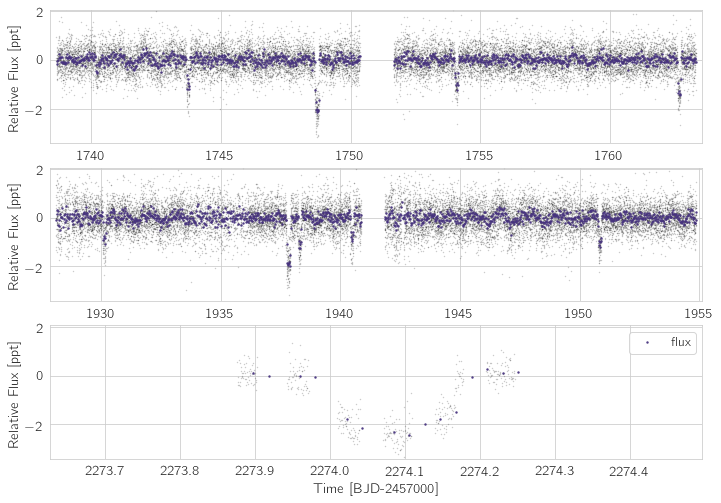

In [5]:
newlc.plot(plot_rows=3)

In [40]:
model2 = fit.monoModel(27491137, 'tess', savefileloc='/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-21_0')
model2.LoadModelFromFile(loadfile='/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-21_0_model.pickle')

Getting all IDs
Empty TableList


True

In [41]:
model2.trace.shape

AttributeError: 'MultiTrace' object has no attribute 'shape'

In [6]:
model2 = fit.monoModel(27491137, 'tess', lc=newlc)
model2.init_starpars(Rstar=np.array([0.8,0.03,0.03]),
                    Teff=np.array([5210,100,100]),
                    logg=np.array([4.68,0.1,0.1]),
                    FeH=-0.15)

In [7]:
model2.add_planet('multi',{'tcen':1743.7199,'period':10.355004,'period_err':0.00004,
                          'tdur':3.3/24,'depth':1.4e-3},'b')
model2.add_planet('multi',{'tcen':1748.675688904365,'period':21.01557,'period_err':0.0001,
                        'tdur':0.2,'depth':2.2e-3},'c')
model2.add_planet('duo',{'tcen':1762.6651396199247,'tcen_2':1938.2899096646295,
                        'tdur':0.15,'depth':2e-3},'d')
model2.init_model(use_GP=False, bin_oot=False, cutDistance=3.75)

ch
ts
ch
ts
ch
ts


optimizing logp for variables: [tdur_d, b_d, logror_d, b_c, logror_c, b_b, logror_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -11118.925749343147 -> -11048.484281212657
optimizing logp for variables: [t0_2_d, logror_d, per_c, logror_c, per_b, logror_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -11048.484281212657 -> -11047.619836164315
optimizing logp for variables: [tdur_d, b_d, logror_d, t0_d, omega_c, ecc_c, b_c, logror_c, t0_c, omega_b, ecc_b, b_b, logror_b, t0_b, logrho_S]


message: Desired error not necessarily achieved due to precision loss.
logp: -11047.619836164315 -> -10997.656187879664
optimizing logp for variables: [phot_mean, logs2]


message: Optimization terminated successfully.
logp: -10997.656187879667 -> -3410.6999886092376
optimizing logp for variables: [tdur_d, b_d, logror_d, per_c, b_c, logror_c, per_b, b_b, logror_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -3410.6999886092403 -> -3244.952654063677
optimizing logp for variables: [u_star_cheops, u_star_tess, logrho_S, Rs, logs2, phot_mean, tdur_d, b_d, logror_d, t0_d, omega_c, ecc_c, b_c, logror_c, t0_c, omega_b, ecc_b, b_b, logror_b, t0_b]


message: Desired error not necessarily achieved due to precision loss.
logp: -3244.952654063677 -> -3212.010654507052
optimizing logp for variables: [phot_mean, logs2, u_star_cheops, u_star_tess, tdur_d, b_d, logror_d, t0_2_d, t0_d, b_c, omega_c, ecc_c_frac, ecc_c_sigma_rayleigh, ecc_c_sigma_gauss, ecc_c, logror_c, per_c, t0_c, b_b, omega_b, ecc_b_frac, ecc_b_sigma_rayleigh, ecc_b_sigma_gauss, ecc_b, logror_b, per_b, t0_b, Rs, logrho_S]


message: Desired error not necessarily achieved due to precision loss.
logp: -3212.010654507052 -> -3209.98927550384


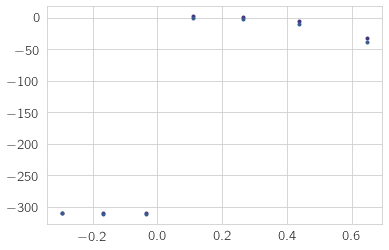

In [8]:
plt.plot(model2.init_soln['max_ecc_d'],model2.init_soln['v_prior_d'],'.')
plt.plot(model2.init_soln['max_ecc_d'],model2.init_soln['logprob_marg_d'],'.')

In [9]:
model2.RunMcmc(n_draws=1000)

['/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-21_0', '/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137'] False


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phot_mean, logs2, u_star_cheops, u_star_tess, tdur_d, b_d, logror_d, t0_2_d, t0_d, b_c, omega_c, ecc_c_frac, ecc_c_sigma_rayleigh, ecc_c_sigma_gauss, ecc_c, logror_c, per_c, t0_c, b_b, omega_b, ecc_b_frac, ecc_b_sigma_rayleigh, ecc_b_sigma_gauss, ecc_b, logror_b, per_b, t0_b, Rs, logrho_S]


Sampling 4 chains for 660 tune and 1_000 draw iterations (2_640 + 4_000 draws total) took 6316 seconds.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


['gp_', '_gp', 'light_curve', '__', 'model_rv', 'marg_all_lc', 'marg_all_rv', 'rv_model', 'rv_trend', 'nonmarg_rvs', 'mono_uniform_index', 'logliks', '_priors', 'logprob_marg', 'logrho_S', 'mono_pers', 'duo_pers', 'mono_eccs', 'duo_eccs', 'mono_omegas', 'duo_omegas'] ['Rs', 'per_b', 'per_c', 'logs2', 'phot_mean', 'rho_S', 'Ms', 't0_b', 'logror_b', 'ror_b', 'rpl_b', 'logmassest_b', 'ecc_b', 'ecc_b_sigma_gauss', 'ecc_b_sigma_rayleigh', 'ecc_b_frac', 'omega_b', 'b_b', 'a_Rs_b', 't0_c', 'logror_c', 'ror_c', 'rpl_c', 'logmassest_c', 'ecc_c', 'ecc_c_sigma_gauss', 'ecc_c_sigma_rayleigh', 'ecc_c_frac', 'omega_c', 'b_c', 'a_Rs_c', 't0_d', 't0_2_d', 'per_d', 'logror_d', 'ror_d', 'rpl_d', 'logmassest_d', 'b_d', 'tdur_d', 'vel_d', 'logvel_d', 'min_ecc_d', 'omega_d', 'a_Rs_d', 'u_star_tess', 'u_star_cheops', 'dist_in_transit_b', 'vel_b', 'logvel_b', 'tdur_b', 'dist_in_transit_c', 'vel_c', 'logvel_c', 'tdur_c', 'per_prior_d', 'max_ecc_d', 'v_prior_d', 'logprior_d', 'logprob_d', 'ecc_d', 'ecc_marg_d'

In [39]:

sns.set_style('whitegrid')
sns.set_palette('viridis')

from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
rc('text.latex', preamble=r'\usepackage{cmbright}')

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 


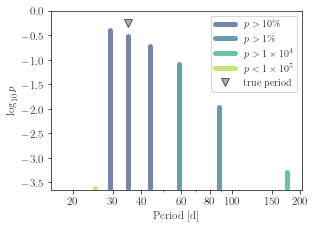

In [45]:
from scipy.special import logsumexp
pal=sns.color_palette('viridis_r',7)
coldic={-6:"$p<1\\times10^{5}$",-5:"$p>1\\times10^{5}$",-4:"$p>1\\times10^{4}$",-3:"$p>0.1\%$",-2:"$p>1\%$",-1:"$p>10\%$",0:"$p>100\%$"}
plt.figure(figsize=(4.5,3.3))
plot_pers=['d']
pmax=185
pmin=16
ymin=-3.66
ymax=0.0
xlog=True
npl=0;pl='d'

#As we're using the nanmedian log10(prob)s for each period, we need to make sure their sums add to 1.0
probs= logsumexp(model2.trace['logprob_marg_'+pl] - logsumexp(model2.trace['logprob_marg_'+pl]),axis=0)/np.log(10)
pers = np.nanmedian(model2.trace['per_'+pl],axis=0)

pmax = np.nanmax(pers)*1.03 if pmax is None else pmax
pmin = np.nanmin(pers)*0.9 if pmin is None else pmin
ymin = np.min(probs[pers<pmax])-0.5 if ymin is None else ymin
ymax = np.max(probs[pers<pmax])+0.5 if ymax is None else ymax
#psum=logsumexp(np.nanmedian(self.trace['logprob_marg_'+pl],axis=0))/np.log(10)
#Plotting lines
cols=[]
#plt.plot(pers,prob_prcnts[0,:],":",color='C0',alpha=0.65)
#plt.plot(pers,prob_prcnts[2,:],":",color='C0',alpha=0.65)
ordered_prob_index=np.arange(len(probs))[np.argsort(probs)][::-1]
for n in ordered_prob_index:
    # Density Plot and Histogram of all arrival delays
    #nprob=probs[n]
    ncol=int(np.floor(np.clip(probs[n],-6,0)))
    if ncol not in cols:
        cols+=[ncol]
        plt.plot(np.tile(pers[n],2),
                     [ymin+0.05,probs[n]],
                     linewidth=5.0,color=pal[6+ncol],alpha=0.7,label=coldic[ncol])
    else:
        plt.plot(np.tile(pers[n],2),
                     [ymin+0.05,probs[n]],
                     linewidth=5.0,color=pal[6+ncol],alpha=0.7)

#plt.title("Duo - "+str(pl))
plt.ylim(ymin,ymax)
if xlog:
    plt.xscale('log')
    plt.xticks([20,30,40,60,80,100,150,200,250,300,350,400,450,500,600,700],
               np.array([20,30,40,60,80,100,150,200,250,300,350,400,450,500,600,700]).astype(str))
    #plt.xticklabels([20,40,60,80,100,150,200,250])
plt.xlabel("Period [d]")

plt.ylabel("$\log_{10}{p}$")
plt.xlim(pmin,pmax*1.1)

plt.plot(35.1,-0.25,'v',markersize=8,color='#777',markeredgecolor='k',label='true period',alpha=0.6)
plt.legend(loc=1,fontsize=10)

plt.savefig("TOI-2076CheopsPaper/Pre-Cheops_modelling_d_postref.pdf")


In [50]:
probs= logsumexp(model2.trace['logprob_marg_'+pl] - logsumexp(model2.trace['logprob_marg_'+pl]),axis=0)/np.log(10)
pers = np.nanmedian(model2.trace['per_'+pl],axis=0)

print({pers[p]:np.power(10,probs[p]) for p in range(len(probs))})

{175.6261644077665: 0.0005174124550325532, 87.81308220388325: 0.010973832745222206, 58.54205480258884: 0.0823560004468592, 43.90654110194163: 0.1873846972845805, 35.1252328815533: 0.3112538262484036, 29.27102740129442: 0.4075142308199012, 25.08945205825236: 2.5664421845427488e-20}


In [54]:
0.3112538262484036/0.010973832745222206

28.363274115319232

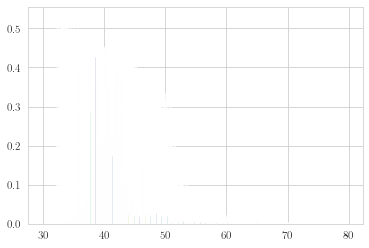

In [42]:
_=plt.hist(model2.trace['a_Rs_c'],bins=np.arange(30,80,0.2),density=True,alpha=0.5,label='sma')
_=plt.hist((1+model2.trace['ecc_c'])*model2.trace['a_Rs_c'],bins=np.arange(30,80,0.2),density=True,alpha=0.5,label='aphel')
_=plt.hist((1+model2.trace['ecc_c']+(np.exp(model2.trace['logmassest_c']-12.7156)/(3*model2.trace['Ms']))**(1/3))*model2.trace['a_Rs_c'],bins=np.arange(30,80,0.2),density=True,alpha=0.5,label='hillsph')


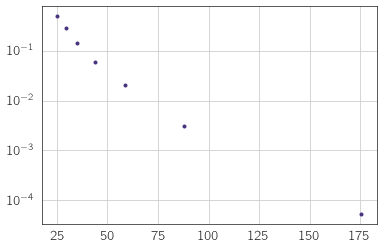

In [47]:
plt.plot(np.average(model2.trace['per_d'],axis=0),np.average(np.exp(model2.trace['logprob_marg_'+pl]),axis=0),'.')
plt.yscale('log')

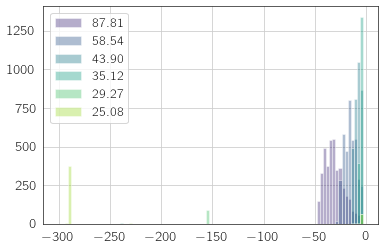

In [43]:
for n in range(1,7):
    _=plt.hist(model2.trace['logprob_marg_'+pl][:,n],bins=np.arange(-300,0,3),alpha=0.4,label=str(np.average(model2.trace['per_d'][:,n]))[:5])
plt.legend()

In [44]:
{n:(np.sum(model2.trace['logprob_marg_'+pl][:,n]<-100)/4000,np.average(model2.trace['logprob_marg_'+pl][model2.trace['logprob_marg_'+pl][:,n]>-100,n])) for n in range(7)}


{0: (0.0, -66.7337205015773),
 1: (0.0, -31.08675251053967),
 2: (0.0, -14.950499541986927),
 3: (0.0, -6.941350487517772),
 4: (0.001, -3.1024633596565687),
 5: (0.034, -1.4330730178998368),
 6: (0.158, -0.7266490608967013)}

In [3]:
import pickle
dicts=pickle.load(open("/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-19_0_model.pickle","rb"))

In [31]:
model2.trace.varnames

['logrho_S_interval__',
 'Rs',
 't0_b_interval__',
 'per_b',
 'logror_b_interval__',
 'ecc_b_interval__',
 'ecc_b_sigma_gauss_lowerbound__',
 'ecc_b_sigma_rayleigh_lowerbound__',
 'ecc_b_frac_interval__',
 'omega_b_angle__',
 'b_b_impact__',
 't0_c_interval__',
 'per_c',
 'logror_c_interval__',
 'ecc_c_interval__',
 'ecc_c_sigma_gauss_lowerbound__',
 'ecc_c_sigma_rayleigh_lowerbound__',
 'ecc_c_frac_interval__',
 'omega_c_angle__',
 'b_c_impact__',
 't0_d_interval__',
 't0_2_d_interval__',
 'logror_d_interval__',
 'b_d_impact__',
 'tdur_d_interval__',
 'u_star_tess_interval__',
 'u_star_cheops_interval__',
 'logs2',
 'phot_mean',
 'logrho_S',
 'rho_S',
 'Ms',
 't0_b',
 'logror_b',
 'ror_b',
 'rpl_b',
 'ecc_b',
 'ecc_b_sigma_gauss',
 'ecc_b_sigma_rayleigh',
 'ecc_b_frac',
 'omega_b',
 'b_b',
 'a_Rs_b',
 't0_c',
 'logror_c',
 'ror_c',
 'rpl_c',
 'ecc_c',
 'ecc_c_sigma_gauss',
 'ecc_c_sigma_rayleigh',
 'ecc_c_frac',
 'omega_c',
 'b_c',
 'a_Rs_c',
 't0_d',
 't0_2_d',
 'per_d',
 'logror_d',

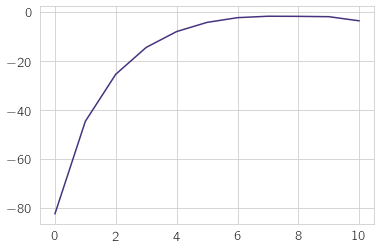

In [7]:
trace=dicts['trace']

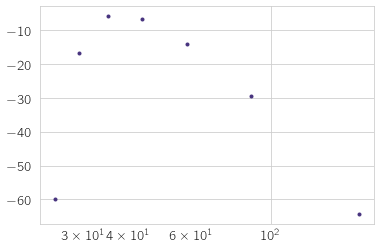

In [19]:
plt.plot(np.average(model2.trace['per_d'],axis=0),np.average(model2.trace['logprob_marg_d'],axis=0),'.')
plt.xscale('log')

(array([   6.,    9.,   39.,  112.,  394.,  811., 1343., 1665., 1054.,
         167.]),
 array([-4798.04737791, -4795.76607393, -4793.48476996, -4791.20346599,
        -4788.92216202, -4786.64085805, -4784.35955407, -4782.0782501 ,
        -4779.79694613, -4777.51564216, -4775.23433819]),
 <BarContainer object of 10 artists>)

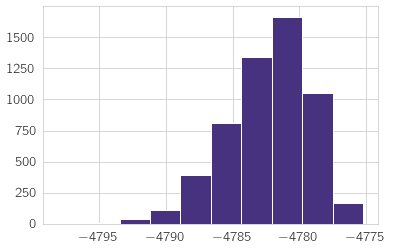

In [14]:
plt.hist(trace.llk_gp)

In [16]:
trace['per_b'].shape

(5600,)

In [1]:
import pickle
import os
loadname="/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2021-11-19_1_model.pickle"
max_bytes = 2**31 - 1
## read
bytes_in = bytearray(0)
input_size = os.path.getsize(loadname)
with open(loadname, 'rb') as f_in:
    for _ in range(0, input_size, max_bytes):
        bytes_in += f_in.read(max_bytes)
loaded = pickle.loads(bytes_in)
dicts2={}
if type(loaded)==dict:
    for key in loaded:
        dicts2[key]=loaded[key]
else:
    dicts2=loaded


/Users/hosborn/miniconda3/envs/newxo/lib/python3.9/site-packages/theano/configparser.py:255: UserWarning: Theano does not recognise this flag: gcc.cxxflags
  warnings.warn(f"Theano does not recognise this flag: {key}")
Matplotlib created a temporary config/cache directory at /var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/matplotlib-ap2tf6uj because the default path (/Users/hosborn/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


UnpicklingError: pickle data was truncated

In [ ]:
plt.plot(np.average(trace2['per_d'],axis=0),np.average(trace2['logprob_marg_d'],axis=0),'.')
plt.xscale('log')

In [41]:
model2.Plot()

AttributeError: 'monoModel' object has no attribute 'model_time'

In [ ]:
hillsphs= a_Rs*
aphel = (1+eccs[pl]+(rad_to_mass(r_pl)/3*Ms)**(1/3))*a_Rs

In [51]:
eccs={'b':0.01,'c':0.04,'d':0.125,'e':np.array([0.15,0.08,0.04,0.1,0.18,0.25,0.35])}
a_Rs={'b':9.12345,'c':15.94179,'d':21.73017,'e':np.array([29.6,31.729,39.1789,47.289,55.2801,68.17820,80.0])}
logmassests={'b':1.8,'c':1.15,'d':2.7,'e':2.3}
multis=['b','c','d']
Ms=0.85
1 - np.max([(1+eccs[pl]+(np.exp(logmassests[pl]-12.7156)/(3*Ms))**(1/3))*a_Rs[pl] for i in multis])/a_Rs[pl]


-0.15097646214636917

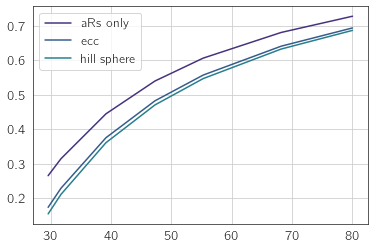

In [66]:
plt.plot(a_Rs['e'],1-np.max([a_Rs[pl] for pl in multis])/a_Rs['e'],label='aRs only')
plt.plot(a_Rs['e'],1-np.max([(1+eccs[pl])*a_Rs[pl] for pl in multis])/a_Rs['e'],label='ecc')
plt.plot(a_Rs['e'],1-np.max([(1+eccs[pl]+(np.exp(logmassests[pl]-12.7156)/(3*Ms))**(1/3))*a_Rs[pl] for pl in multis])/a_Rs['e'],label='hill sphere')
plt.legend()


21.73017